In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ["Non_Fraudulent", "Fraudulent"]
     
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()
     

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Summary statistics
print(df.describe())

                Time             V1             V2             V3  \
count  284807.000000  284807.000000  284807.000000  284807.000000   
mean    94813.859575       0.000017       0.000008       0.014970   
std     47488.145955       1.958679       1.651295       8.073856   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54201.500000      -0.920327      -0.598532      -0.890365   
50%     84692.000000       0.018027       0.065467       0.179832   
75%    139320.500000       1.315632       0.803724       1.027212   
max    172792.000000       2.454930      22.057729    4232.000000   

                  V4             V5             V6             V7  \
count  284807.000000  284807.000000  284807.000000  284807.000000   
mean        0.000023       0.000022      -0.000016       0.000029   
std         1.415859       1.380234       1.332244       1.237076   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.848611      -0.6915

In [4]:
# Evaluate number of columns and rows in given dataset

Number_of_row = df.shape[0]
Number_of_column = df.shape[1]

print('Number of rows in df file     :', Number_of_row)
print('Number of columns in df file  :', Number_of_column)

Number of rows in df file     : 284807
Number of columns in df file  : 31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory Data Analysis

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

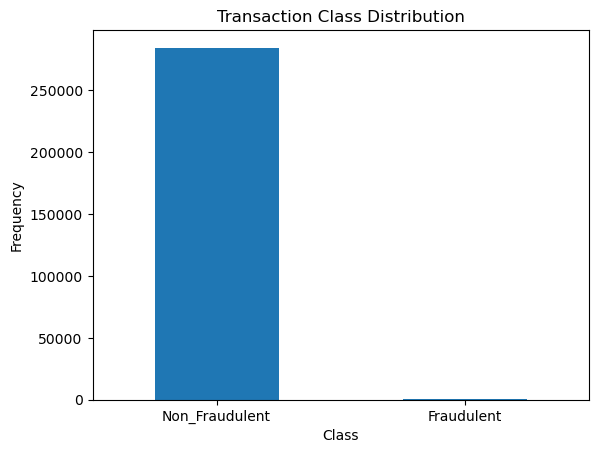

In [8]:
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

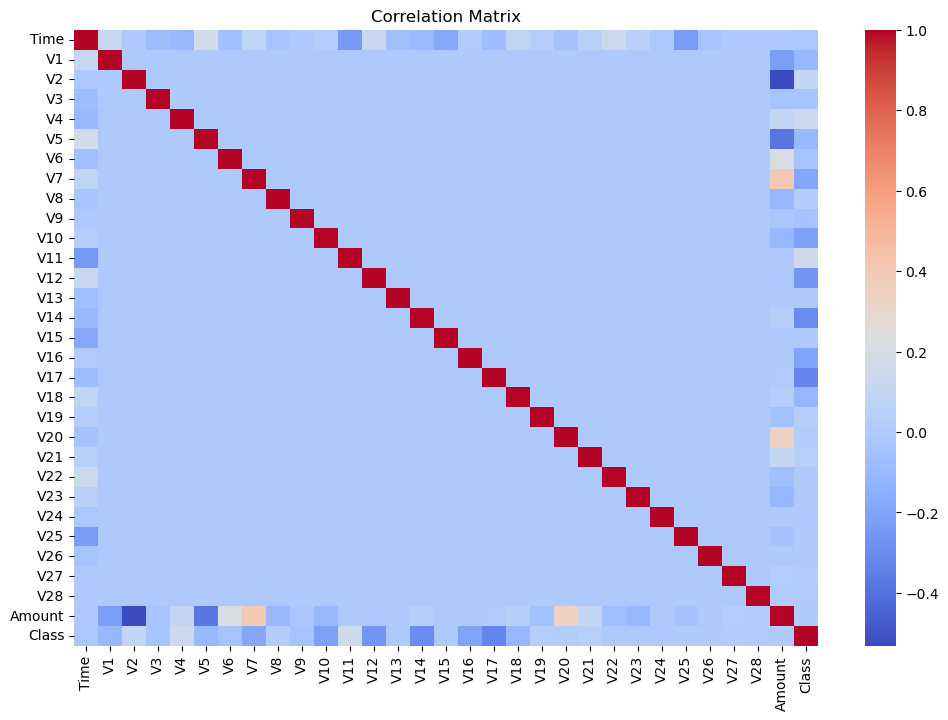

In [9]:

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


#### _This Dataset is highly unbalanced

In [10]:
Non_Fraudulent= df[df["Class"] == 0]
print ("Non_Fraudulent:", Non_Fraudulent.shape)
Fraudulent= df[df["Class"] == 1]
print ("Fraudulent:", Fraudulent.shape)

Non_Fraudulent: (284315, 31)
Fraudulent: (492, 31)


In [11]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
Fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
Non_Fraudulent.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
df.groupby('Class').mean()
     

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008274,-0.006263,0.027167,-0.007837,0.005475,0.002403,0.009666,-0.000985,0.008785,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### _Under-Sampling_

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [14]:
Non_Fraudulent_sample = Non_Fraudulent.sample(n=492)

#### _Concatenating two DataFrames_

In [15]:
new_dataset = pd.concat([Non_Fraudulent_sample, Fraudulent], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258866,158856.0,2.068454,-1.220696,-1.116493,-0.754262,-0.575173,0.198353,-0.804973,0.110660,0.223773,...,-0.128207,-0.282108,0.181467,0.349023,-0.060442,-0.355585,-0.024522,-0.059444,55.19,0
9224,13266.0,1.148080,-0.991834,1.299267,-0.286694,-1.727364,-0.237626,-1.277858,0.075846,1.003411,...,0.263262,0.833237,-0.141740,0.513162,0.324915,-0.121270,0.000389,0.023553,89.95,0
231956,146992.0,-0.303349,1.077423,-0.439382,-0.474360,0.507029,-0.700396,0.925844,0.070086,-0.505994,...,0.434505,1.236417,-0.180111,-0.585031,-0.312352,-0.123843,0.084584,0.154410,49.73,0
48527,43684.0,-0.976443,0.439405,1.149273,0.166857,0.040892,-0.217767,0.320248,0.287040,-0.213150,...,-0.157172,-0.230536,0.227801,0.025807,0.085243,0.206280,-0.361070,-0.334015,29.45,0
232622,147240.0,1.788792,-0.337726,-0.824577,1.479888,0.086002,0.385607,-0.075023,0.099840,0.760822,...,-0.240269,-0.480050,0.205490,0.687597,0.022244,-0.877915,0.024816,-0.034525,71.00,0


In [17]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [18]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91774.796748,-0.076568,-0.162621,-0.007414,-0.076169,-0.016041,0.199022,0.037596,-0.009585,-0.074117,...,-0.035651,-0.020590,-0.012036,-0.011407,0.048554,0.036246,-0.005682,-0.040748,0.049487,105.121911
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### _Splitting the data into Features & Targets_

In [19]:
#Create X and Y

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
     

In [20]:

print(X)

            Time        V1        V2        V3        V4        V5        V6  \
258866  158856.0  2.068454 -1.220696 -1.116493 -0.754262 -0.575173  0.198353   
9224     13266.0  1.148080 -0.991834  1.299267 -0.286694 -1.727364 -0.237626   
231956  146992.0 -0.303349  1.077423 -0.439382 -0.474360  0.507029 -0.700396   
48527    43684.0 -0.976443  0.439405  1.149273  0.166857  0.040892 -0.217767   
232622  147240.0  1.788792 -0.337726 -0.824577  1.479888  0.086002  0.385607   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(Y)

258866    0
9224      0
231956    0
48527     0
232622    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## HoldOut Validation Approach- Train And Test Split

# Model Training

#### _Split the data into Training data & Testing Data with 70-30 division_

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=2)


In [23]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [24]:
print(X_train.shape)

(787, 30)


# Model Evaluation

In [25]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### _ Logistic Regression classifier_

In [26]:

# Train a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression()

In [27]:

# Make predictions
y_pred = clf.predict(X_test)

In [28]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

#### _Accuracy Score_

In [29]:

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9441624365482234
Confusion Matrix:
 [[92  3]
 [ 8 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        95
           1       0.97      0.92      0.94       102

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [30]:
#### _Random forest classifier_

In [31]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Make predictions with Random Forest
y_pred_rf = rf_classifier.predict(X_test)

In [33]:
# Evaluate Random Forest model
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, y_pred_rf)
class_report_rf = classification_report(Y_test, y_pred_rf)

In [34]:
# Display accuracy and evaluation results
print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classifier Classification Report:\n", class_report_rf)

Random Forest Classifier Accuracy: 0.9390862944162437
Random Forest Classifier Confusion Matrix:
 [[92  3]
 [ 9 93]]
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        95
           1       0.97      0.91      0.94       102

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [35]:

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, Y_train)


GradientBoostingClassifier(random_state=42)

In [36]:
# Make predictions with Gradient Boosting
y_pred_gb = gb_classifier.predict(X_test)

In [37]:
# Evaluate Gradient Boosting model
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(Y_test, y_pred_gb)
class_report_gb = classification_report(Y_test, y_pred_gb)

In [38]:
print("\nGradient Boosting Classifier Accuracy:", accuracy_gb)
print("Gradient Boosting Classifier Confusion Matrix:\n", conf_matrix_gb)
print("Gradient Boosting Classifier Classification Report:\n", class_report_gb)


Gradient Boosting Classifier Accuracy: 0.9543147208121827
Gradient Boosting Classifier Confusion Matrix:
 [[93  2]
 [ 7 95]]
Gradient Boosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        95
           1       0.98      0.93      0.95       102

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197



In conclusion, credit card fraud detection is crucial for financial institutions and consumers alike. While this report presents a basic implementation, further refinement and exploration of advanced techniques are essential for building robust and effective fraud detection systems.